# Taylor's theorem: how we can verify our derivatives

How can I verify the correctness of any auto-differentiation software, or any differentiation in general when I don't have
a symbolic or closed form solution to compare to? One idea proposed by professor Ruthotto is based on the Taylor theorem. You've certainly heard of Taylor approximation or Taylor polynomials. These are all results people use based on the Taylor 
theorem itself. We'll take a look at the Taylor theorem test implemented in the one-dimensional case, and then see how it can 
be extended to multi-dimensional case with matrices as such.

### Taylor's Theorem in the one variable case

Let $k\geq1$ be an integer and let the function $f:\mathbb{R}\to\mathbb{R}$ be $k$ times differentiable at the point $a \in \mathbb{R}$. Then $\exists h_k:\mathbb{R}\to\mathbb{R}$ such that

\begin{gather}
f(x)=f(a)+f'(a)(x-a)+\frac{f''(a)(x-a)^2}{2!}+ \dots + \frac{f^{(k)}(a)(x-a)^k}{k!}+h_k(x)(x-a)^k \\\\
\lim_{x \to a}h_k(x)=0
\end{gather}


We can demonstrate how the polynomial section of Taylor's Theorem can be used to approximate functions for $f(x)=e^x$ and $f(x)=x^3$

### Function approximation with Taylor's Theorem

In [89]:
import autograd.numpy as np
import autograd as ag
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [102]:
def f(x):
    return x**3

f_grad = ag.grad(f)

def taylor_approx(x, f, k, a=0.):
    """
    Computes kth order Taylor approximation for the function f centered at point a, for all x's
    """
    y = f(a)
    grad = f
    for i in np.arange(1, k+1):
        grad = ag.grad(grad)
        y += (grad(a)*((x-a)**i)) / math.factorial(i)
    return y

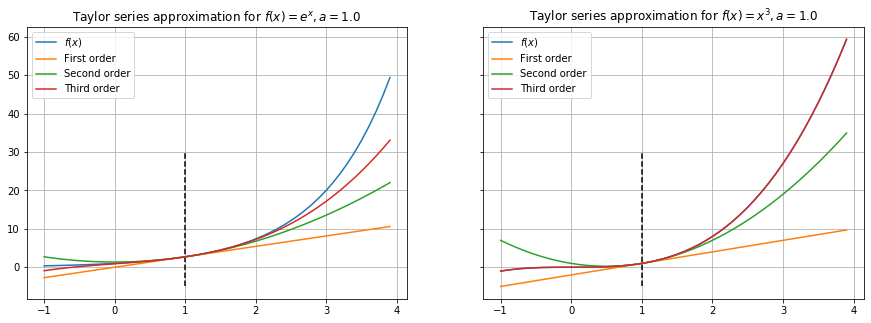

In [106]:
a = 1.
x = np.arange(-1,4,.1)
firstf = taylor_approx(x, f, k=1, a=a); secondf = taylor_approx(x, f, k=2, a=a); thirdf = taylor_approx(x, f, k=3, a=a)
first = taylor_approx(x, np.exp, k=1, a=a); second = taylor_approx(x, np.exp, k=2, a=a); third = taylor_approx(x, np.exp, k=3, a=a)

fig, ((ax1, ax2)) = plt.subplots(1, 2, sharey=True, figsize=(15,5))
ax1.grid(b=True)
ax2.grid(b=True)
ax1.set_title("Taylor series approximation for $f(x)=e^x, a={}$".format(a))
ax1.vlines(a, -5, 30, linestyles = "dashed")
ax1.plot(x, np.exp(x), label="$f(x)$"); ax1.plot(x, first, label="First order")
ax1.plot(x, second, label="Second order"); ax1.plot(x, third, label="Third order")
ax1.legend()
ax2.set_title("Taylor series approximation for $f(x)=x^3, a={}$".format(a))
ax2.vlines(a, -5, 30, linestyles = "dashed")
ax2.plot(x, f(x), label="$f(x)$"); ax2.plot(x, firstf, label="First order")
ax2.plot(x, secondf, label="Second order"); ax2.plot(x, thirdf, label="Third order")
ax2.legend()

### Derivative test theory

Now we can think about how we can use the Taylor identity to verify our first derivative is correct. Given the Taylor Theorem, what must be true about the first derivative? Let's see how we can use algebra to rearrange the equation. Let's revisit our Taylor equation, but lump all the terms with an order higher than the first derivative into a term "c". 

\begin{gather}
f(x)=f(a)+f'(a)(x-a)+c_1(x,a) \\\\
f(x)-f(a)=f'(a)(x-a)+c_1(x,a)
\end{gather}

What about isolating the second derivative? That would also give us information about our first derivative.

\begin{gather}
f(x)=f(a)+f'(a)(x-a)+\frac{f''(a)(x-a)^2}{2!}+c_2(x,a) \\\\
f(x)-f(a)-f'(a)(x-a)=\frac{1}{2}f''(a)(x-a)^2+c_2(x,a)
\end{gather}

I'm actually not sure how this test works. What the slides say is that the first term is supposed to decay $O(h)$, while the 
second term decays at $O(h^2)$. But what's important is the extra c term. For example, for the function $f(x)=x^3$

\begin{gather}
d_1=f(x)-f(a)=f'(a)(x-a)+\frac{1}{2!}f''(a)(x-a)^2+\frac{1}{3!}f'''(a)(x-a)^3\\\\
= 3a^2(x-a)+3a(x-a)^2+(x-a)^3\\\\ 
d_2=f(x)-f(a)-f'(a)(x-a)=\frac{1}{2!}f''(a)(x-a)^2+\frac{1}{3!}f'''(a)(x-a)^3 \\\\
= 3a(x-a)^2+(x-a)^3 \\\\ 
\end{gather}

Using the notation in class, so $x=W+hD$, and $a=hD$

\begin{gather}
d_1=f(W+hD)-f(W)=f'(W)(hD)+\frac{1}{2!}f''(W)(hD)^2+\frac{1}{3!}f'''(W)(hD)^3\\\\
= 3W^2(hD)+3W(hD)^2+(hD)^3\\\\ 
d_2=f(W+hD)-f(W)-f'(W)(hD)=\frac{1}{2!}f''(W)(hD)^2+\frac{1}{3!}f'''(W)(hD)^3 \\\\
= 3W(hD)^2+(hD)^3 \\\\ 
\end{gather}

When I asked Lars, he actually said there should be a correction. Instead of evaluating the RHS at $W$, choose a point $V \in [W, W+hD]$ to evaluate the derivatives. Then the identities become

\begin{gather}
d_1=f(W+hD)-f(W)=f'(V)(hD)=3V^2(hD), V \in [W, W+hD] \\\\ 
d_2=f(W+hD)-f(W)-f'(W)(hD)=\frac{1}{2!}f''(V)(hD)^2=3V(hD)^2\\\\ 
\end{gather}

It's clear that $d_1$ follows by the Mean Value Theorem. Therefore this appears to show that this difference actually changes by $O(h)$. But my previous identity wasn't wrong, it was technically correct as well. That is the definition of the Taylor approximation. So how can these two identities be reconciled? I think the problem here is that $V$ also depends on $h$ linearly, so the true order as a function of $h$ must take both $V$ and explicit $h$ into account. 

In [268]:
h = np.array([1,.8,.6,.4,2e-1,2e-2,2e-3,2e-6,2e-8])
d = 1.
w = 1.

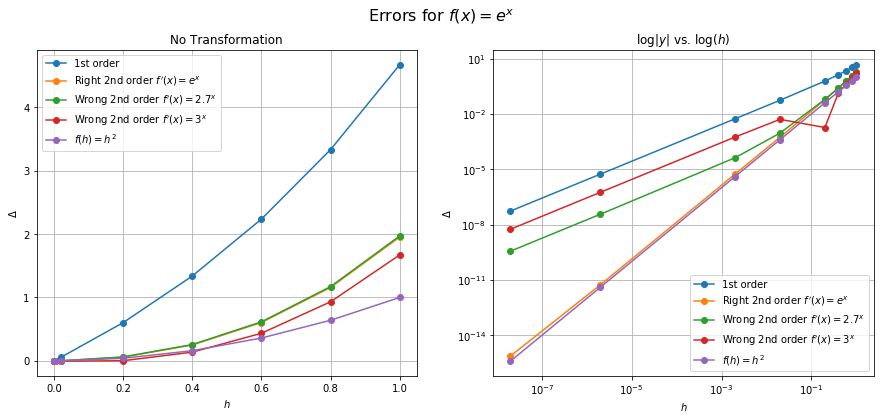

In [290]:
def f(x):
    return np.exp(x)

def f_grad(x):
    return np.exp(x)

def f_grad_wrong(x):
    return 2.7**x

def f_grad_really_wrong(x):
    return 3**x

# BLUE - first order 
d1 = f(w+h*d)-f(w)
# ORANGE - right second order
d2 = f(w+h*d)-f(w)-f_grad(w)*(h*d)
# GREEN - wrong second order
d3 = f(w+h*d)-f(w)-f_grad_wrong(w)*(h*d)
# RED - really wrong second order
d4 = f(w+h*d)-f(w)-f_grad_really_wrong(w)*(h*d)

# Actual plot
l1 = "1st order"
l2 = "Right 2nd order $f'(x)=e^x$"
l3 = "Wrong 2nd order $f'(x)=2.7^x$"
l4 = "Wrong 2nd order $f'(x)=3^x$"

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle("Errors for $f(x)=e^x$", fontsize=16)
ax1.grid(b=True)
ax2.grid(b=True)
ax1.set_title("No Transformation")
ax1.plot(h, d1, marker="o",label=l1) 
ax1.plot(h, d2, marker="o", label=l2)
ax1.plot(h, d3, marker="o", label=l3)
ax1.plot(h, d4, marker="o", label=l4)
ax1.plot(h, h**2, marker="o", label="$f(h)=h^2$")
ax1.set_ylabel("$\Delta$")
ax1.set_xlabel("$h$")
ax1.legend()

ax2.set_title("$\log|y|$ vs. $\log(h)$")
ax2.plot(h, np.abs(d1), marker="o",label=l1) 
ax2.plot(h, np.abs(d2), marker="o", label=l2)
ax2.plot(h, np.abs(d3), marker="o", label=l3)
ax2.plot(h, np.abs(d4), marker="o", label=l4)
ax2.plot(h, h**2, marker="o", label="$f(h)=h^2$")
ax2.set_ylabel("$\Delta$")
ax2.set_xlabel("$h$")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.legend()

To understand the behavior of log transformations on the x and y scale, take a look at this easy example where we just look 
at the different polynomials $x^3, x^2, x$

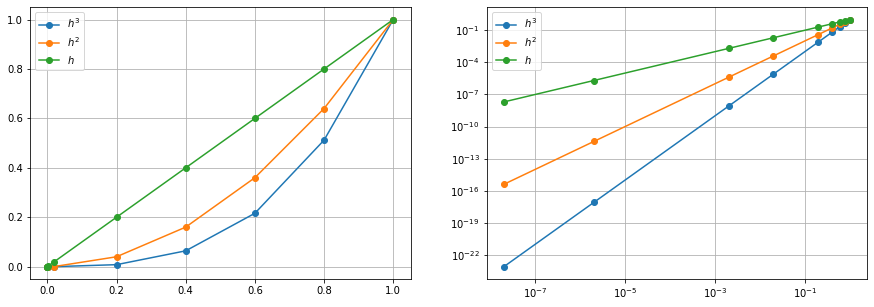

In [291]:
cube = h**3
square = h**2

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15,5))
ax1.grid(b=True)
ax1.plot(h, cube, label="$h^3$", marker="o")
ax1.plot(h, square, label="$h^2$", marker="o")
ax1.plot(h, h, label="$h$", marker="o")
ax1.legend()
ax2.grid(b=True)
ax2.plot(h, cube, label="$h^3$", marker="o")
ax2.plot(h, square, label="$h^2$", marker="o")
ax2.plot(h, h, label="$h$", marker="o")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.legend()

The log log plot turns them into lines, each with a slope equal to their exponent and a y intercept at 0. 